# **SELF DRIVING CAR**

# Assignment:

# Importing packages

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import pi
from itertools import islice
import cv2
import tensorflow as tf
import pickle

# Reading images names from text file

File 'data.txt' is a text file containig name of the frame and corresponding steering angle(True Value).

We will be reading from this txt file, and for a given name of the frame, from folder 'driving_dataset' we will get the image/frame and input in list 'X' and from text file corresponding to the same file we will add steering angle to list 'y'. So we will have frame and steering value in correct order in list 'X' and 'y' respectively. In the for loop we will also convert the value of steering from degrees to radian by multiplying the value by 'pi/180'.

In [ ]:
DATA_FOLDER = '/home/ubuntu/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/'
os.path.exists('/home/ubuntu/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/')

True

In [ ]:
#reading the data set from data.txt
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')

split = 0.7
X = []
y = []

#islice(text, start, stop, LIMIT) --> ('ABCDEF', 2, None) --> 'C D E F'  -->https://docs.python.org/2/library/itertools.html
with open(TRAIN_FILE) as f:
    for line in islice(f, None):
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        X.append(full_path)
        y.append(float(angle)*pi/180)

y = np.array(y)
print('Finished processing')

#Splitting data in a 70/30 ratio:
split_index = int(len(y)*0.7)
train_y = y[:split_index]
test_y = y[split_index:]

Finished processing


In [ ]:
print(len(X[:len(train_y)]))
print(len(X[len(train_y):]))

31784
13622


In [ ]:
import pickle
with open('pickle/assignment/train_y', 'wb') as f:
    pickle.dump(train_y, f)
    
import pickle
with open('pickle/assignment/test_y', 'wb') as f:
    pickle.dump(test_y, f)

In [ ]:
X[0]

'/home/tiwariprashant/Hunny/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/0.jpg'

In [ ]:
img = cv2.imread(X[0])
print('Original_size of the image:', img.shape)
print("After taking the last 150 rows i.e lower part of the images where road is present, ",img[-150:].shape)
img = img[-150:]
resized_img = cv2.resize(img, (200,66))  # 200/66 = 455/150 = 3.0303 => we are keeping aspect ratio when we are resizing it
print('shape after resizing it:', resized_img.shape)

Original_size of the image: (256, 455, 3)
After taking the last 150 rows i.e lower part of the images where road is present,  (150, 455, 3)
shape after resizing it: (66, 200, 3)


## Cropping frames/images:

Let's look how some of the frames look like:

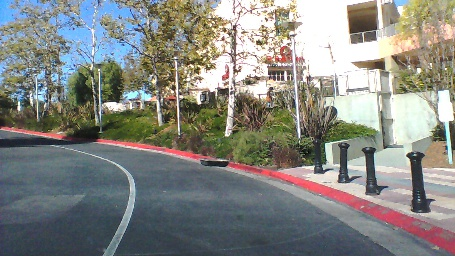

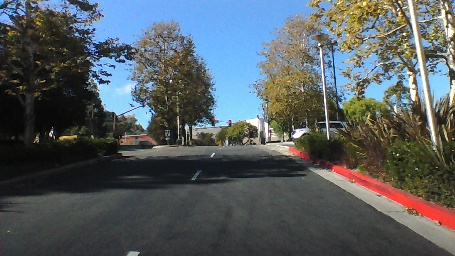

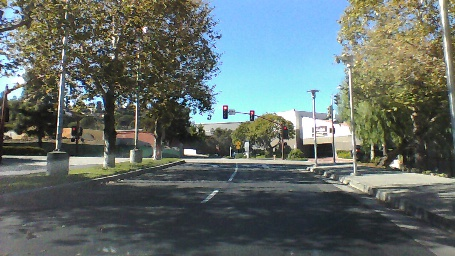

In [ ]:
from IPython.display import Image
display(Image(filename='/home/ubuntu/ML/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/508.jpg'))
display(Image(filename='/home/ubuntu/ML/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/600.jpg'))
display(Image(filename='/home/ubuntu/ML/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/700.jpg'))

As you can see in the above images that frames have road only on lower part of frame.
So we will resize all the images. Purpose of doing this is that steering angle is solely dependant on the road/path of the vehicle, so the upper part of frame is useless and will be redundant while training the model. So we will eliminate the upper part and take only the lower part of image.

### Cropping all images from Train Data

In [ ]:
X_train = []
for i in X[:len(train_y)]:
    img = cv2.imread(i)
    img = img[-150:]
    resized_img = cv2.resize(img, (200,66))
    X_train.append(resized_img)

In [ ]:
X_train = np.array(X_train)

In [ ]:
import pickle
with open('/home/ubuntu/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/assignment/assign_train', 'wb') as f:
    pickle.dump(X_train, f)

In [ ]:
print(X_train.shape)

(31784, 66, 200, 3)


In [ ]:
X_train[0]

array([[[160, 158, 177],
        [171, 172, 175],
        [166, 173, 174],
        ...,
        [107,  87,  86],
        [107,  98, 111],
        [ 87, 102, 103]],

       [[190, 189, 192],
        [205, 192, 185],
        [201, 198, 189],
        ...,
        [ 89,  75,  77],
        [ 62,  70,  67],
        [ 61,  88,  71]],

       [[221, 203, 210],
        [233, 214, 200],
        [226, 213, 202],
        ...,
        [124, 133, 137],
        [128, 135, 136],
        [125, 129, 134]],

       ...,

       [[ 53,  42,  53],
        [ 60,  44,  59],
        [ 52,  41,  54],
        ...,
        [ 23,  23,  22],
        [ 28,  26,  25],
        [ 28,  25,  24]],

       [[ 57,  36,  58],
        [ 63,  33,  52],
        [ 54,  37,  50],
        ...,
        [ 21,  25,  23],
        [ 24,  27,  25],
        [ 27,  28,  24]],

       [[ 41,  38,  67],
        [ 49,  41,  52],
        [ 36,  50,  50],
        ...,
        [ 26,  24,  27],
        [ 26,  23,  27],
        [ 24,  21,  23]]

### Cropping all images from Test Data

In [ ]:
X_val = []
for j in X[len(train_y):]:
    img = cv2.imread(i)
    img = img[-150:]
    resized_img = cv2.resize(img, (200,66))
    X_val.append(resized_img)

In [ ]:
X_val = np.array(X_val)

In [ ]:
import pickle
with open('/home/ubuntu/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/assignment/assign_val', 'wb') as f:
    pickle.dump(X_val, f)

In [ ]:
print(X_val.shape)

(13622, 66, 200, 3)


In [ ]:
X_val[0]

array([[[ 41,  50,  54],
        [ 35,  45,  48],
        [ 39,  46,  48],
        ...,
        [ 33,  44,  38],
        [ 56,  68,  61],
        [ 68,  97,  86]],

       [[ 42,  50,  56],
        [ 44,  50,  55],
        [ 48,  53,  56],
        ...,
        [120, 165, 161],
        [ 82, 126, 120],
        [ 89, 147, 137]],

       [[ 33,  37,  41],
        [ 35,  41,  46],
        [ 39,  44,  47],
        ...,
        [111, 175, 162],
        [ 59, 118, 108],
        [ 80, 140, 126]],

       ...,

       [[ 70,  63,  71],
        [ 74,  65,  68],
        [ 77,  68,  68],
        ...,
        [ 56,  43,  41],
        [ 57,  45,  41],
        [ 56,  46,  39]],

       [[ 71,  63,  66],
        [ 76,  63,  65],
        [ 78,  63,  65],
        ...,
        [ 46,  45,  42],
        [ 46,  46,  40],
        [ 49,  46,  41]],

       [[ 67,  64,  62],
        [ 69,  63,  65],
        [ 71,  66,  68],
        ...,
        [ 45,  44,  41],
        [ 45,  43,  39],
        [ 43,  39,  34]]

In [ ]:
X_train.shape

(31784, 66, 200, 3)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(train_y.shape)
print(test_y.shape)

(31784, 66, 200, 3)
(13622, 66, 200, 3)
(31784,)
(13622,)


## Scaling train and test data

In [ ]:
X_train = X_train/255.0
X_val = X_val/255.0
image_shape=(66, 200, 3)

In [ ]:
print(X_train.shape)
print(train_y.shape)
print(X_val.shape)
print(test_y.shape)
print(image_shape)

(31784, 66, 200, 3)
(31784,)
(13622, 66, 200, 3)
(13622,)
(66, 200, 3)


In [ ]:
import pickle
with open('/home/ubuntu/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/X_train', 'wb') as f:
    pickle.dump(X_train, f)    
with open('/home/ubuntu/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/X_val', 'wb') as f:
    pickle.dump(X_val, f)    
with open('/home/ubuntu/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/train_y', 'wb') as f:
    pickle.dump(train_y, f)    
with open('/home/ubuntu/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/test_y', 'wb') as f:
    pickle.dump(test_y, f)    
with open('/home/ubuntu/Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/image_shape', 'wb') as f:
    pickle.dump(image_shape, f)

In [ ]:
#load from here

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import pi
from itertools import islice
import cv2
import tensorflow as tf
import pickle
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization
from keras import Sequential
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import  ModelCheckpoint
from tensorflow.keras.constraints import MinMaxNorm

In [ ]:
with open('Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/X_train', 'rb') as f:
    X_train = pickle.load(f)
with open('Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/X_val', 'rb') as f:
    X_val = pickle.load(f)
with open('Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/train_y', 'rb') as f:
    train_y = pickle.load(f)
with open('Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/test_y', 'rb') as f:
    test_y = pickle.load(f)
with open('Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/image_shape', 'rb') as f:
    image_shape = pickle.load(f)

"with open('Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/255/img_size', 'rb') as f:\n    img_size = pickle.load(f)"

## Plotting pdf of train_y and y_test:

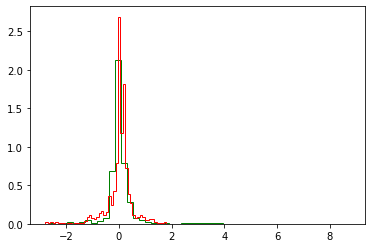

In [ ]:
import numpy;

# PDF of train and test 'y' values. 
import matplotlib.pyplot as plt 
plt.hist(train_y, density=1, bins=50, color='green', histtype ='step');
plt.hist(test_y, density=1, bins=50, color='red', histtype ='step');
plt.show()

For both the datasets, We can see the peak(maximum value) at a value 0, because most of the time steering angle is 0 and deflects only at turns or overtaking another vehicle.

In [ ]:
#Model 0: Base line Model: y_test_pred = mean(train_y_i) 
train_mean_y = np.mean(train_y)

print('Test_MSE(MEAN):%f' % np.mean(np.square(test_y-train_mean_y)) )

print('Test_MSE(ZERO):%f' % np.mean(np.square(test_y-0.0)) )

Test_MSE(MEAN):0.241561
Test_MSE(ZERO):0.241107


# Making Model:

For the model I will be using three layers of Conv2D followed by dropout and Maxpooling. 

After that I will flatten the output from these layers and then input it to three Dense layers. I will also be using Dropouts on dense layers to reduce overfitting.

In [3]:
img_input = tf.keras.Input(image_shape)

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', name='conv_1')(img_input)
x = tf.keras.layers.Dropout(0.5, name='dropout_1')(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='valid')(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', name='conv_2')(x)
x = tf.keras.layers.Dropout(0.5, name='dropout_2')(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='valid')(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), padding='same', name='conv_3')(x)
x = tf.keras.layers.Dropout(0.5, name='dropout_3')(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='valid')(x)


x = tf.keras.layers.Flatten(name='flatten')(x)
x = tf.keras.layers.Dropout(0.5, name='dropout_4')(x)
x = tf.keras.layers.Dense(128, activation='relu', name='dense_layer_1')(x)
x = tf.keras.layers.Dropout(0.5, name='dropout_5')(x)
x = tf.keras.layers.Dense(64, activation='relu', name='dense_layer_2')(x)
x = tf.keras.layers.Dropout(0.5, name='dropout_6')(x)

output = tf.keras.layers.Dense(1, activation=tf.keras.activations.linear, name='output')(x) #note we have used atan to use tan inverse activation

model = tf.keras.models.Model(inputs=img_input, outputs=output, name='model-2')

In [4]:
model.summary()

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 66, 200, 3)]      0         
_________________________________________________________________
conv-1 (Conv2D)              (None, 33, 100, 32)       896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 100, 32)       0         
_________________________________________________________________
activation (Activation)      (None, 33, 100, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 50, 32)        0         
_________________________________________________________________
conv-2 (Conv2D)              (None, 8, 25, 64)         18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 25, 64)         0   

## Compiling

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')

In [ ]:
batch_size = 100
Epochs = 25

In [ ]:
checkpoint_file_name = 'pickle/chk/june_6.hdf5'
model_checkpoint = ModelCheckpoint(checkpoint_file_name, monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [model_checkpoint]

## Fitting the model:

In [ ]:
history = model.fit(X_train, train_y, batch_size=batch_size, epochs=Epochs, validation_data=(X_val, test_y), callbacks=callbacks, verbose=1)

Epoch 1/25
318/318 [==============================] - 44s 136ms/step - loss: 0.3215 - val_loss: 0.2410

Epoch 00001: val_loss improved from inf to 0.24101, saving model to Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/chk/june_6.hdf5
Epoch 2/25
318/318 [==============================] - 41s 128ms/step - loss: 0.3127 - val_loss: 0.2413

Epoch 00002: val_loss did not improve from 0.24101
Epoch 3/25
318/318 [==============================] - 42s 132ms/step - loss: 0.3119 - val_loss: 0.2409

Epoch 00003: val_loss improved from 0.24101 to 0.24094, saving model to Self Driving/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/pickle/chk/june_6.hdf5
Epoch 4/25
318/318 [==============================] - 42s 132ms/step - loss: 0.3056 - val_loss: 0.2417

Epoch 00004: val_loss did not improve from 0.24094
Epoch 5/25
318/318 [==============================] - 42s 131ms/step - loss: 0.2936 - val_loss: 0.2416

Epoch 00005: val_loss did not improve from 0.24094
Epo

Best test loss we got from the model is 0.24094.

### Using the model to rotate the steering:

In [ ]:
#real one
#to rotate the steering image refer https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html
#steering_image
import struct

model_1 = tf.keras.models.load_model('chk/june_6.hdf5')
steering_img = cv2.imread('steering_wheel_image.jpg')
rows, cols = steering_img.shape[0], steering_img.shape[1]

cap = cv2.VideoCapture('video/Self_driving_test.mp4')

smoothed_angle = 0
while True:
    ret, frame = cap.read()
    resized_frame = cv2.resize(frame, (200,66))
    resized_frame = resized_frame/255.0
    resized_frame = np.expand_dims(resized_frame, axis=0)
    degrees = (model_1.predict(resized_frame) * 180/scipy.pi)  #to convert the radians to degrees
    cv2.imshow('frame', frame)
    #make smooth angle transitions by turning the steering wheel based on the difference of the current angle
    #and the predicted angle
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    smoothed_angle= float(smoothed_angle)
    #degrees= float(degrees)
    M = cv2.getRotationMatrix2D((cols/2, rows/2), -smoothed_angle, 1)
    dst = cv2.warpAffine(steering_img, M, (cols,rows))
    cv2.imshow('steering_wheel', dst)
    print(smoothed_angle)
    
    if cv2.waitKey(1)==27:
        break
        
cv2.destroyAllWindows()
cap.release()

# Result:

After trying out various models the best model we got gave us the test loss of 0.24094. Which is less than what we got earlier from base model i.e Test_MSE(MEAN):0.241561
and Test_MSE(ZERO):0.241107

# Brief Description of Procedure followed:

* Read the name of the image/frame and steering angle corresponding to it and appended in seperate lists X and y respectively.

* Divided the data X and y in train and test datasets in a ratio of 70:30.

* Cropped every frame of train and test such that only the part where road/path is visible is kept as steering angle depends only on road.

* Scaled the data by dividing all values by 255.

* Plotted pdf of y_train and y_test. Plot showed that both had similar distribution.

* After that I made a Deep Learning model and trained it for 25 epochs and got a loss of 0.24094.

* Finally this model was put to work by using a test video. A function read the video frame by frame and for a given frame output was given as an angle, and this result is visualized using opencv where one can see the steering rotating as per the predictions of angle made by model as per the frame.